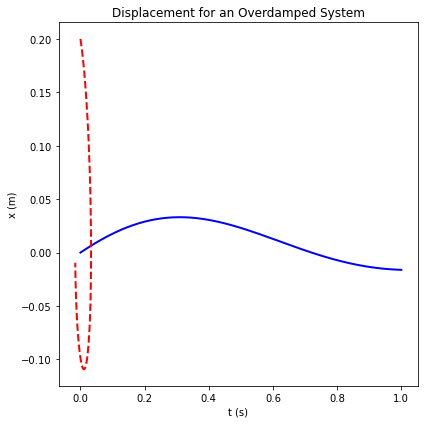

In [6]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

k = 20.0
gamma = 1.0
m = 5
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.0
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.0
b42 = 0.0
b43 = 1.0

f_m = lambda t: 0
f_xy_x = lambda t,x,v:v
f_xy_v = lambda t,x,v: f_m(t)-2*gamma*v-k*x
tf = 1.0
ti = 0.0
n = 500
dt = (tf-ti)/(n-1)
x_TS = np.linspace(ti,tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_iv = 0.0  # x(0) initial value
v_iv = 0.2  # v(0) initial value
t[0]=ti
x[0]=x_iv
v[0]=v_iv
#exact solution
omega_n=sqrt(k/m)
zeta_od=gamma/(2*m*omega_n)
omega_d=omega_n*sqrt(1-zeta_od**2)

A= x_iv
B= v_iv
DI= A
DII= (B+A*zeta_od*omega_n)/omega_d


# define rk4xt
def rk4_x (ti,xi,vi,dt):
    K1 = f_xy_x(ti,xi,vi)
    K2 = f_xy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = f_xy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = f_xy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    x_1= xi+(c1*K1+c2*K2+c3*K3+c4*K4) * dt
    return x_1

#define rk4vt
def rk4_v (ti,xi,vi,dt):
    K1 = f_xy_v(ti,xi,vi)
    K2 = f_xy_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_xy_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_xy_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    v_1=vi+(c1* K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return v_1


def xod_of_t (DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(DI*cos(omega_d*t)+DII*sin(omega_d*t))


def vod_of_t (DI,DII,zeta,omega_n,omega_d,t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (
        omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


# Main Operation
for i in range(1, n):
    t[i] = ti+i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1], v[i-1],dt)
    
x_od = [xod_of_t(DI, DII, zeta_od, omega_n, omega_d, tval) for tval in x_TS]
v_od = [vod_of_t(DI, DII, zeta_od, omega_n, omega_d, tval) for tval in x_TS]
fig = plt.figure(figsize=(6,6))

plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(x,v,label="Runge-Kutta4 under",color="r",linestyle="--",linewidth="2.0")
plt.title("Displacement for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

k = 20.0
gamma = 1.0
m = 5
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.0
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.0
b42 = 0.0
b43 = 1.0

f_m = lambda t: 0
f_xy_x = lambda t,x,v:v
f_xy_v = lambda t,x,v: f_m(t)-2*gamma*v-k*x

n = 500
dt = (tf-ti)/(n-1)

#exact solution
omega_n=sqrt(k/m)
zeta_ud=gamma/(2*m*omega_n)
omega_d=omega_n*sqrt(1-zeta_ud**2)

def x_of_t(lI,lII,t):
    return 1/(lI-lII)*exp(lI*t)+1/(lII-lI)*exp(lII*t)
def v_of_t(lI,lII,t):
    return lI/(lI-lII)*exp(lI*t)+lII/(lII-lI)*exp(lII*t)

zeta = 1.1
omega_n = 1.
lambda_I = -omega_n * (zeta - sqrt(zeta**2 - 1))
lambda_II = -omega_n * (zeta + sqrt(zeta**2 - 1))

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(lambda_I, lambda_II,tval) for tval in t]


# define rk4xt
def rk4_x (ti,xi,vi,dt):
    K1 = f_xy_x(ti,xi,vi)
    K2 = f_xy_x(ti + a2 * dt, xi + b21 * K1 * dt, vi)
    K3 = f_xy_x(ti + a3 * dt, xi + b31 * K1 * dt + b32 * K2 * dt, vi)
    K4 = f_xy_x(ti + a4 * dt, xi + b41 * K1 * dt + b42 * K2 * dt + b43 * K3 * dt, vi)
    x_1= xi+(c1*K1+c2*K2+c3*K3+c4*K4) * dt
    return x_1

#define rk4vt
def rk4_v (ti,xi,vi,dt):
    K1 = f_xy_v(ti,xi,vi)
    K2 = f_xy_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_xy_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_xy_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    v_1=vi+(c1* K1 + c2 * K2 + c3 * K3 + c4 * K4) * dt
    return v_1




# Main Operation
for i in range(1, n):
    t[i] = ti+i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1], v[i-1],dt)
    
fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(lambda_I,lambda_II,t[0])
v0 = v_of_t(lambda_I,lambda_II,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()
